In [1]:
import os
import json
import gzip
import pandas as pd
import numpy as np
!pwd

/home/nico/Desktop/Galvanize/capstone/Fancy_food_Recommender


In [2]:
### load the meta data

data = []
with gzip.open('../Grocery_and_Gourmet_Food.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

5074160
{'overall': 5.0, 'verified': True, 'reviewTime': '06 4, 2013', 'reviewerID': 'ALP49FBWT4I7V', 'asin': '1888861614', 'reviewerName': 'Lori', 'reviewText': 'Very pleased with my purchase. Looks exactly like the picture and will look great on my cake. It definitely will sparkle.', 'summary': 'Love it', 'unixReviewTime': 1370304000}


In [3]:
# convert list into pandas dataframe

df = pd.DataFrame.from_dict(data)

print(len(df))

5074160


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5074160 entries, 0 to 5074159
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   overall         float64
 1   verified        bool   
 2   reviewTime      object 
 3   reviewerID      object 
 4   asin            object 
 5   reviewerName    object 
 6   reviewText      object 
 7   summary         object 
 8   unixReviewTime  int64  
 9   vote            object 
 10  image           object 
 11  style           object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 430.7+ MB


# so for products we have 

reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
asin - ID of the product, e.g. 0000013714
reviewerName - name of the reviewer
vote - helpful votes of the review
style - a dictionary of the product metadata, e.g., "Format" is "Hardcover"
reviewText - text of the review
overall - rating of the product
summary - summary of the review
unixReviewTime - time of the review (unix time)
reviewTime - time of the review (raw)
image - images that users post after they have received the product

to do
change the name overall to rating
change the name reviewText to review
change the name summary to review_summary

think about style, summary, reviewTime, image, unixReview time, drop these for now. 

In [5]:
#df[df['image'].notna()]
# 70935 actually have a link to the image to show. out of 5,074,160

In [6]:
len(df['style'].notna())

5074160

In [7]:
#df['style'].head(1000)

In [13]:
df_reviews = df.drop(['reviewTime','unixReviewTime','image','style'], axis=1)
df_reviews = df[df['vote'].fillna('0')]

KeyError: "None of [Index(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0',\n       ...\n       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],\n      dtype='object', length=5074160)] are in the [columns]"

In [16]:
['helpful_votes']
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5074160 entries, 0 to 5074159
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   overall       float64
 1   verified      bool   
 2   reviewerID    object 
 3   asin          object 
 4   reviewerName  object 
 5   reviewText    object 
 6   summary       object 
 7   vote          object 
dtypes: bool(1), float64(1), object(6)
memory usage: 275.8+ MB


In [18]:
df_reviews[df_reviews['vote'].notnull()]
df_reviews['helpful_votes'] = df_reviews['vote']
df_reviews['rating'] = df_reviews['overall']
df_reviews['reviewTitle'] = df_reviews['summary']
df_reviews = df_reviews.drop(['overall','summary','vote'],axis=1)
df_reviews.head(100)

,verified,reviewerID,asin,reviewerName,reviewText,helpful_votes,rating,reviewTitle
0,True,ALP49FBWT4I7V,1888861614,Lori,Very pleased with my purchase. Looks exactly l...,NaN,5.0,Love it
1,True,A1KPIZOCLB9FZ8,1888861614,BK Shopper,Very nicely crafted but too small. Am going to...,NaN,4.0,Nice but small
2,True,A2W0FA06IYAYQE,1888861614,daninethequeen,still very pretty and well made...i am super p...,NaN,4.0,"the ""s"" looks like a 5, kina"
3,True,A2PTZTCH2QUYBC,1888861614,Tammara,"I got this for our wedding cake, and it was ev...",NaN,5.0,Would recommend this to a friend!
4,True,A2VNHGJ59N4Z90,1888861614,LaQuinta Alexander,It was just what I want to put at the top of m...,NaN,4.0,Topper
...,...,...,...,...,...,...,...,...
95,True,ADVA88NC8HPEI,4639725043,Tom Kokoshka,Tried many teas ..... this is my standard reli...,NaN,5.0,but this is very good tea at a good price
96,True,A3UHPPVPM1TRNX,4639725043,Nocal ken,Basic good morning tea.,NaN,4.0,Good morning tea
97,True,A1CMJ5QJ8AJVDC,4639725043,M. Koch,"Okay, but this is not the same Yellow Label Te...",NaN,4.0,"Okay, but this is not the same Yellow Label ..."
98,True,A2VADVLLJES4YM,4639725043,Redford John,I'm not much of a tea drinker but my wife and ...,NaN,3.0,I Prefer Coffee


In [31]:
df_reviews['vote'].tail(1000)

5073160    NaN
5073161    NaN
5073162    NaN
5073163    NaN
5073164    NaN
          ... 
5074155    NaN
5074156    NaN
5074157    NaN
5074158    NaN
5074159    NaN
Name: vote, Length: 1000, dtype: object

In [33]:
data[7]

{'overall': 3.0,
 'verified': True,
 'reviewTime': '11 6, 2013',
 'reviewerID': 'A3QBT8YC3CZ7C9',
 'asin': '1888861614',
 'reviewerName': 'Rela1982',
 'reviewText': 'It was a nice size for a cake topper and it was very sparkley. I will purchase more products in the future from this source.',
 'summary': 'Great Buy.',
 'unixReviewTime': 1383696000}

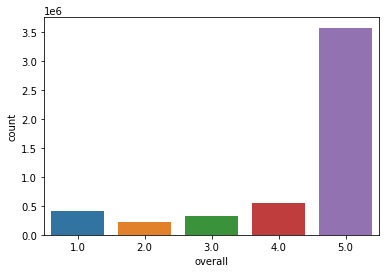

In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.countplot(df['rating']) 
plt.show()

# META DataFrame

In [15]:

### load the meta data

meta = []
with gzip.open('../meta_Grocery_and_Gourmet_Food.json.gz') as f:
    for l in f:
        meta.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(meta))

# first row of the list
print(meta[0])

287051
{'category': ['Grocery & Gourmet Food', 'Dairy, Cheese & Eggs', 'Cheese', 'Gouda'], 'tech1': '', 'description': ['BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS', 'Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition.'], 'fit': '', 'title': 'Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs', 'also_buy': [], 'image': [], 'tech2': '', 'brand': 'Ariola Imports', 'feature': [], 'rank': '165,181 in Grocery & Gourmet Food (', 'also_view': ['B0000D9MYM', 'B0000D9MYL', 'B00ADHIGBA', 'B00H9OX598', 'B001LM42GY', 'B001LM5TDY'], 'main_cat': 'Grocery', 'similar_item': '', 'date': '', 'price': '$41.91', 'asin': '0681727810'}


In [16]:
# convert list into pandas dataframe

meta_df = pd.DataFrame.from_dict(meta)

print(len(meta_df))



287051


In [21]:
### remove rows with unformatted title (i.e. some 'title' may still contain html style content)

df3 = meta_df.fillna('')
# df4 = df3[df3.title.str.contains('getTime')] # unformatted rows
# df5 = df3[~df3.title.str.contains('getTime')] # filter those unformatted rows
print(len(df4))
print(len(df5))

0
287051


In [42]:
df3

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,details
0,"[Grocery & Gourmet Food, Dairy, Cheese & Eggs,...",,"[BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS, Stat...",,Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,[],[],,Ariola Imports,[],"165,181 in Grocery & Gourmet Food (","[B0000D9MYM, B0000D9MYL, B00ADHIGBA, B00H9OX59...",Grocery,,,$41.91,0681727810,
1,"[Grocery & Gourmet Food, Cooking & Baking, Sug...",,"[Shipped from UK, please allow 10 to 21 busine...",,Trim Healthy Mama Xylitol,"[B01898YHXK, B01BCM6LAC, B00Q4OL47O, B00Q4OL5Q...",[https://images-na.ssl-images-amazon.com/image...,,,[],"315,867 in Grocery & Gourmet Food (",[],Grocery,,,,0853347867,
2,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",,[Jazz up your cakes with a sparkling monogram ...,,Letter C - Swarovski Crystal Monogram Wedding ...,[],[],,Unik Occasions,[],"[>#669,941 in Kitchen & Dining (See Top 100 in...",[B07DXN65TF],Amazon Home,,"September 21, 2010",$29.95,1888861118,
3,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",,"[Large Letter - Height 4.75""]",,Letter H - Swarovski Crystal Monogram Wedding ...,[],[],,Other,"[Large Letter - Height 4.75""]","[>#832,581 in Kitchen & Dining (See Top 100 in...",[],Amazon Home,,"September 11, 2011",$11.45,1888861517,
4,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",,"[4.75""]",,Letter S - Swarovski Crystal Monogram Wedding ...,[],[],,Unik Occasions,"[4.75"" height]","[>#590,999 in Kitchen & Dining (See Top 100 in...",[],Amazon Home,,"September 11, 2011",$15.00,1888861614,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287046,"[Grocery & Gourmet Food, Jams, Jellies & Sweet...",,[Caffarel fruit jellies are a product of Italy...,,"Caffarel Fruit Jellies, Organic Assorted, 200 ...","[B01HULC3TC, B07C8L4NWL, B014UTG6D6, B01M3UOLAP]",[],,Caffarel,[],"369,384 in Grocery & Gourmet Food (",[],Grocery,,,,B01HJFBN9A,{' Product Dimensions: ': '11.8 x 4.7...
287047,"[Grocery & Gourmet Food, Condiments & Salad Dr...",,[Hampton Creeks Just Mayo Truffle makes fancy ...,,"HAMPTON CREEK Spo Just Truffle Mayo, 12 Ounce","[B00WNAEX2Q, B071LD7PMJ, B01HJF6FRA, B072HG8GF...",[],,Hampton Creek,[],"113,710 in Grocery & Gourmet Food (",[],Grocery,,,$10.89,B01HJFC704,"{'Shipping Weight:': '12 ounces (', 'Domestic ..."
287048,"[Grocery & Gourmet Food, Condiments & Salad Dr...",,[Nothing compares with the classically zesty f...,,"HAMPTON CREEK Just Ranch Dressing, 12 Fluid Ounce","[B071LD7PMJ, B00KOHNX6C, B00OVN2F64, B01HJEHE9...",[],,Hampton Creek,[],"21,731 in Grocery & Gourmet Food (",[],Grocery,,,$10.95,B01HJF6FRA,"{'Shipping Weight:': '10.4 ounces (', 'Domesti..."
287049,"[Grocery & Gourmet Food, Herbs, Spices & Seaso...",,[],,Gourmet Pure Vanilla Bean Pastes - Organically...,"[B00DUF219A, B01HJHX9ZO, B07K4K26PQ, B000H7ENQ...",[https://images-na.ssl-images-amazon.com/image...,,Heilala Vanilla,[],472 in Grocery & Gourmet Food (,[],Grocery,,,$14.97,B01HJHSVG6,"{'Shipping Weight:': '5.6 ounces (', 'ASIN: ':..."


In [23]:
df5

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,details
0,"[Grocery & Gourmet Food, Dairy, Cheese & Eggs,...",,"[BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS, Stat...",,Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,[],[],,Ariola Imports,[],"165,181 in Grocery & Gourmet Food (","[B0000D9MYM, B0000D9MYL, B00ADHIGBA, B00H9OX59...",Grocery,,,$41.91,0681727810,
1,"[Grocery & Gourmet Food, Cooking & Baking, Sug...",,"[Shipped from UK, please allow 10 to 21 busine...",,Trim Healthy Mama Xylitol,"[B01898YHXK, B01BCM6LAC, B00Q4OL47O, B00Q4OL5Q...",[https://images-na.ssl-images-amazon.com/image...,,,[],"315,867 in Grocery & Gourmet Food (",[],Grocery,,,,0853347867,
2,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",,[Jazz up your cakes with a sparkling monogram ...,,Letter C - Swarovski Crystal Monogram Wedding ...,[],[],,Unik Occasions,[],"[>#669,941 in Kitchen & Dining (See Top 100 in...",[B07DXN65TF],Amazon Home,,"September 21, 2010",$29.95,1888861118,
3,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",,"[Large Letter - Height 4.75""]",,Letter H - Swarovski Crystal Monogram Wedding ...,[],[],,Other,"[Large Letter - Height 4.75""]","[>#832,581 in Kitchen & Dining (See Top 100 in...",[],Amazon Home,,"September 11, 2011",$11.45,1888861517,
4,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",,"[4.75""]",,Letter S - Swarovski Crystal Monogram Wedding ...,[],[],,Unik Occasions,"[4.75"" height]","[>#590,999 in Kitchen & Dining (See Top 100 in...",[],Amazon Home,,"September 11, 2011",$15.00,1888861614,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287046,"[Grocery & Gourmet Food, Jams, Jellies & Sweet...",,[Caffarel fruit jellies are a product of Italy...,,"Caffarel Fruit Jellies, Organic Assorted, 200 ...","[B01HULC3TC, B07C8L4NWL, B014UTG6D6, B01M3UOLAP]",[],,Caffarel,[],"369,384 in Grocery & Gourmet Food (",[],Grocery,,,,B01HJFBN9A,{' Product Dimensions: ': '11.8 x 4.7...
287047,"[Grocery & Gourmet Food, Condiments & Salad Dr...",,[Hampton Creeks Just Mayo Truffle makes fancy ...,,"HAMPTON CREEK Spo Just Truffle Mayo, 12 Ounce","[B00WNAEX2Q, B071LD7PMJ, B01HJF6FRA, B072HG8GF...",[],,Hampton Creek,[],"113,710 in Grocery & Gourmet Food (",[],Grocery,,,$10.89,B01HJFC704,"{'Shipping Weight:': '12 ounces (', 'Domestic ..."
287048,"[Grocery & Gourmet Food, Condiments & Salad Dr...",,[Nothing compares with the classically zesty f...,,"HAMPTON CREEK Just Ranch Dressing, 12 Fluid Ounce","[B071LD7PMJ, B00KOHNX6C, B00OVN2F64, B01HJEHE9...",[],,Hampton Creek,[],"21,731 in Grocery & Gourmet Food (",[],Grocery,,,$10.95,B01HJF6FRA,"{'Shipping Weight:': '10.4 ounces (', 'Domesti..."
287049,"[Grocery & Gourmet Food, Herbs, Spices & Seaso...",,[],,Gourmet Pure Vanilla Bean Pastes - Organically...,"[B00DUF219A, B01HJHX9ZO, B07K4K26PQ, B000H7ENQ...",[https://images-na.ssl-images-amazon.com/image...,,Heilala Vanilla,[],472 in Grocery & Gourmet Food (,[],Grocery,,,$14.97,B01HJHSVG6,"{'Shipping Weight:': '5.6 ounces (', 'ASIN: ':..."


In [30]:

df5.iloc[2]

category        [Grocery & Gourmet Food, Cooking & Baking, Fro...
tech1                                                            
description     [Jazz up your cakes with a sparkling monogram ...
fit                                                              
title           Letter C - Swarovski Crystal Monogram Wedding ...
also_buy                                                       []
image                                                          []
tech2                                                            
brand                                              Unik Occasions
feature                                                        []
rank            [>#669,941 in Kitchen & Dining (See Top 100 in...
also_view                                            [B07DXN65TF]
main_cat                                              Amazon Home
similar_item                                                     
date                                           September 21, 2010
price     

In [31]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287051 entries, 0 to 287050
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   category      287051 non-null  object
 1   tech1         287051 non-null  object
 2   description   287051 non-null  object
 3   fit           287051 non-null  object
 4   title         287051 non-null  object
 5   also_buy      287051 non-null  object
 6   image         287051 non-null  object
 7   tech2         287051 non-null  object
 8   brand         287051 non-null  object
 9   feature       287051 non-null  object
 10  rank          287051 non-null  object
 11  also_view     287051 non-null  object
 12  main_cat      287051 non-null  object
 13  similar_item  287051 non-null  object
 14  date          287051 non-null  object
 15  price         287051 non-null  object
 16  asin          287051 non-null  object
 17  details       287051 non-null  object
dtypes: object(18)
memory usa

In [41]:
df5.columns
df5.drop([]'tech1',])

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'image',
       'tech2', 'brand', 'feature', 'rank', 'also_view', 'main_cat',
       'similar_item', 'date', 'price', 'asin', 'details'],
      dtype='object')

# hello



## for meta data
category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'image',
       'tech2', 'brand', 'feature', 'rank', 'also_view', 'main_cat',
       'similar_item', 'date', 'price', 'asin', 'details'
       


so someone write a text and I find the one that is most similar to it and then jsut display the title of that one and the link to the page with the asin. - maybe even the review that is similar. 

second tab you click words that relate to what you want. cheap, expensive, wet, dry, alchol, cheese, 

### 

In [32]:
# find out all products whose title includes a specified term uses json not pandas though
cands = []
cands2 = []
for d in meta:
    if 'title' in d and 'cheese' in d['title'].lower():
        cands.append(d)
    if 'title' in d and 'french' in d['title'].lower():
        cands2.append(d)

print(len(cands))
print(len(cands2))

4737
2899


In [33]:
# show some example products
for d in cands[:10]:
    print(d['title'])

Blue Cheese Assortment (30 ounce)
Igourmet French Cheese Assortment, 1.8-Pound
Irish Cheese Assortment (30 ounce)
Dutch Cheese Assortment (1.8 pound)
English Cheese Assortment (2 pound)
Selection of Sheep's Milk Cheeses (1.5 pound)
igourmet's Favorites - 4 Cheese Sampler (30 ounce)
igourmet's Favorites - 8 Cheese Sampler (56 ounce)
Igourmet Oktoberfest Cheese Assortment, 2-Pound
Spanish Cheese Assortment 2 Pound Hand Cut Imported from Spain


In [34]:
# build asin set
cands_asin = set([d['asin'] for d in cands])
cands2_asin = set([d['asin'] for d in cands2])
len(cands_asin)

4680

In [38]:
from collections import defaultdict
# align products with reviews
reviews = defaultdict(list)
for l in meta:
    r = l
    a = r['asin']
    if a in cands_asin:
        reviews[a].append(r)

In [2]:
import pandas as pd
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('../Grocery_and_Gourmet_Food.json.gz')

In [3]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style
0,5.0,True,"06 4, 2013",ALP49FBWT4I7V,1888861614,Lori,Very pleased with my purchase. Looks exactly l...,Love it,1370304000,NaN,NaN,NaN
1,4.0,True,"05 23, 2014",A1KPIZOCLB9FZ8,1888861614,BK Shopper,Very nicely crafted but too small. Am going to...,Nice but small,1400803200,NaN,NaN,NaN
2,4.0,True,"05 9, 2014",A2W0FA06IYAYQE,1888861614,daninethequeen,still very pretty and well made...i am super p...,"the ""s"" looks like a 5, kina",1399593600,NaN,NaN,NaN
3,5.0,True,"04 20, 2014",A2PTZTCH2QUYBC,1888861614,Tammara,"I got this for our wedding cake, and it was ev...",Would recommend this to a friend!,1397952000,NaN,NaN,NaN
4,4.0,True,"04 16, 2014",A2VNHGJ59N4Z90,1888861614,LaQuinta Alexander,It was just what I want to put at the top of m...,Topper,1397606400,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5074160 entries, 0 to 5074159
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   overall         float64
 1   verified        bool   
 2   reviewTime      object 
 3   reviewerID      object 
 4   asin            object 
 5   reviewerName    object 
 6   reviewText      object 
 7   summary         object 
 8   unixReviewTime  int64  
 9   vote            object 
 10  image           object 
 11  style           object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 469.4+ MB


In [12]:
#df["vote"].astype()
df[df["vote"].notnull() ]

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style
13,5.0,True,"11 3, 2014",A2CHH5U12THP2D,4639725183,The Purple Bee,Best black tea in US.\n\nHighly recommend.\nI ...,Best black tea in US,1414972800,2,NaN,NaN
15,5.0,True,"05 21, 2014",A378HXZATS9HKM,4639725183,old patty,I first tasted this tea in the Far East and re...,Great Tea flavor,1400630400,2,NaN,NaN
16,5.0,True,"03 23, 2014",A2ZSQ8Y53ZNQK1,4639725183,Charles L. Mitsakos,Truly the finest tea bags in the world. Not ...,A+!,1395532800,5,NaN,NaN
17,4.0,False,"02 8, 2014",A21ZU2TINEQE0H,4639725183,Ken,Tried this while overseas last year; don't rem...,Yellow Label Lipton Tea,1391817600,2,NaN,NaN
19,5.0,True,"12 29, 2013",A1XWZJZLZTMCWK,4639725183,Tom S.,I first tasted it in Caracas on a business tri...,Best Black Tea,1388275200,11,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5074136,5.0,True,"10 4, 2017",A30N97JBKMGEHF,B01HJF6FRA,reba klauber,you would never know this was vegan is very go...,you would never know this was vegan is very go...,1507075200,2,NaN,NaN
5074137,5.0,True,"09 8, 2017",A223YRQH2Z5T1D,B01HJF6FRA,flint5292,"As a new vegan, it is sometimes difficult to r...","As a new vegan, it is sometimes difficult to ...",1504828800,4,NaN,NaN
5074140,5.0,True,"08 4, 2017",A38GDA4TB9EILT,B01HJF6FRA,Moriah Bolyard,The best thing ever is ordering a product you ...,The best thing ever is ordering a product you ...,1501804800,3,NaN,NaN
5074141,5.0,True,"07 4, 2017",A2025PN7HDC5BO,B01HJF6FRA,M.C,I used to love ranch before I became vegan. It...,Just what the vegan ordered!,1499126400,5,NaN,NaN


In [ ]:
[df['vote'] == 2]